### Ejercicio 1

Crea las funciones para calcular:
- la media
- la mediana
- la moda
- la desviacion tipica
- la varianza
- la kurtosis

No utilices las funciones de numpy que las calcula).

Después calcula esos valores para la lista de datos

`x = [5, 7, 4, 9, 3, 2, 5, 12, 9, 2, 5, 6]`

In [23]:
import numpy as np
import matplotlib.pyplot as plt
y = [5, 7, 4, 9, 3, 2, 5, 12, 9, 2, 5, 6]

In [8]:
def ordenar(x):
    y0 = []
    for i in y:
        if i not in y0:
            y0.append(i)
    y0.sort()
    return y0
    
def media(x):
    return sum(x)/len(x)

def mediana(x):    
    index = len(x) // 2
    if len(x)%2==0: return (x[index - 1] + x[index]) / 2
    else: return media(x)
    
def moda(x):
    y0 = []    
    for xi in x:
        y0.append(y0.count(xi))
    d = y0.index(max(y0))
    return x[d]

def varianza(x):
    media1 = media(x)
    y0 = []    
    for xi in x:
        y0.append((xi-media1)**2)
    return sum(y0)/len(x)
    
def desviacion_tipica(x):
    return (varianza(x))**0.5

def curtosis(x):
    y1 = []
    for xi in x:
        y1.append((xi-media(x))**4)
    return (1/len(x))*(sum(y1)/desviacion_tipica(x)**4)-3
    
dic = {"Media": media(y), "Mediana":mediana(y),"Moda":moda(y),"Varianza":varianza(y),"Desviacion tipica":desviacion_tipica(y),"Curtosis": curtosis(y)}
    
print(dic)

{'Media': 5.75, 'Mediana': 3.5, 'Moda': 5, 'Varianza': 8.520833333333334, 'Desviacion tipica': 2.9190466480228325, 'Curtosis': -0.4582827697108467}


### Reto 2

Carga el siguiente dataset y realiza lo siguiente (quizas tengas que instalar `pip install scikit-learn`)

*Antiguedad:*
- Un histograma de la distribucion de antiguedades.
- Un boxplot en el que compares los precios de las casas de mas de 30 años con los de las casas de menos de 30 años

*Ingresos:*
- Un histograma de la distribucion del ingreso medio.
- Un boxplot en el que compares los precios de las casas con un ingreso medio de menos de 3 con mas de 3

*Ocupacion:*
- Un histograma de la distribucion de la ocupacion media
- Un boxplot en el que compares los precios de las casas con una ocupacion menor de 1000 y mayor de 1000

¿Que conclusiones sacas?¿Hay valores atipicos?

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df['Price'] = housing['target']

*Antiguedad:*
- Un histograma de la distribucion de antiguedades.
- Un boxplot en el que compares los precios de las casas de mas de 30 años con los de las casas de menos de 30 años

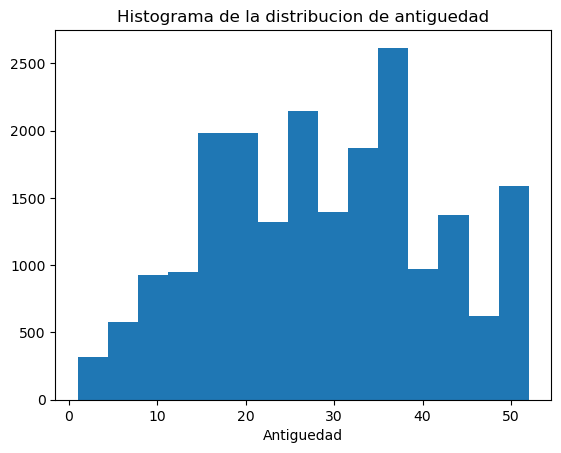

In [15]:
np = df['HouseAge']
plt.hist(np, bins=15)

plt.title("Histograma de la distribucion de antiguedad")
plt.xlabel("Antiguedad")

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11136\263803801.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A < 30', 'A > 30'])


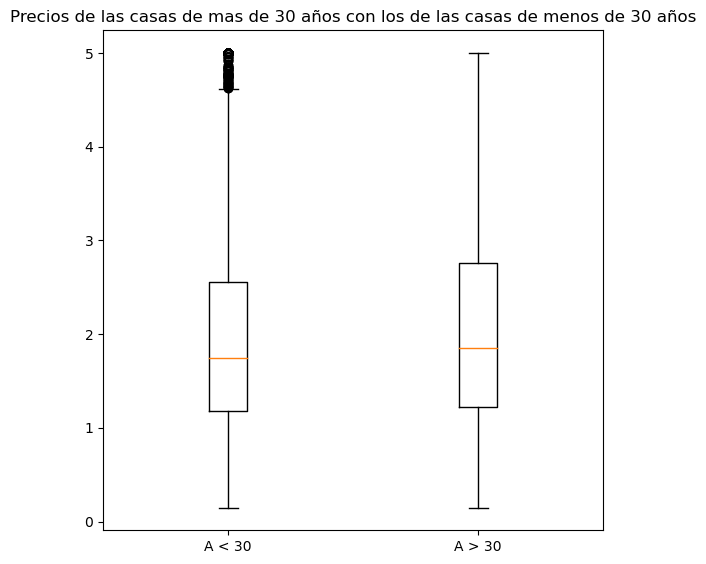

In [25]:
fig = plt.figure(figsize =(5, 5))

ax = fig.add_axes([0, 1, 1, 1])
 
ax.set_xticklabels(['A < 30', 'A > 30'])

bp = ax.boxplot([df['Price'][df.HouseAge < 30], df['Price'][df.HouseAge > 30]])
 
plt.title("Precios de las casas de mas de 30 años con los de las casas de menos de 30 años")

plt.show()

*Ingresos:*
- Un histograma de la distribucion del ingreso medio.
- Un boxplot en el que compares los precios de las casas con un ingreso medio de menos de 3 con mas de 3

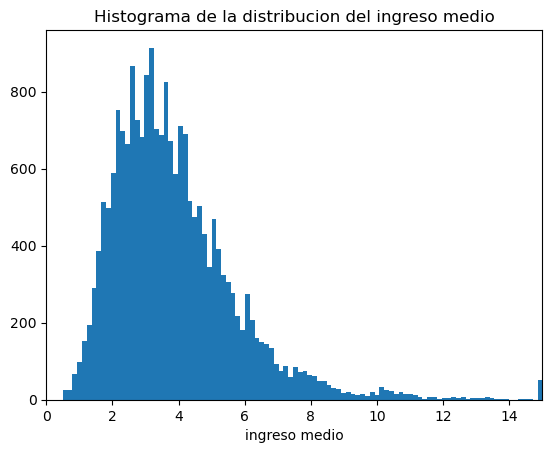

In [16]:
np = df['MedInc']
plt.hist(np, bins=100)

plt.title("Histograma de la distribucion del ingreso medio")
plt.xlabel("ingreso medio")
plt.xlim(0,15)
plt.show()

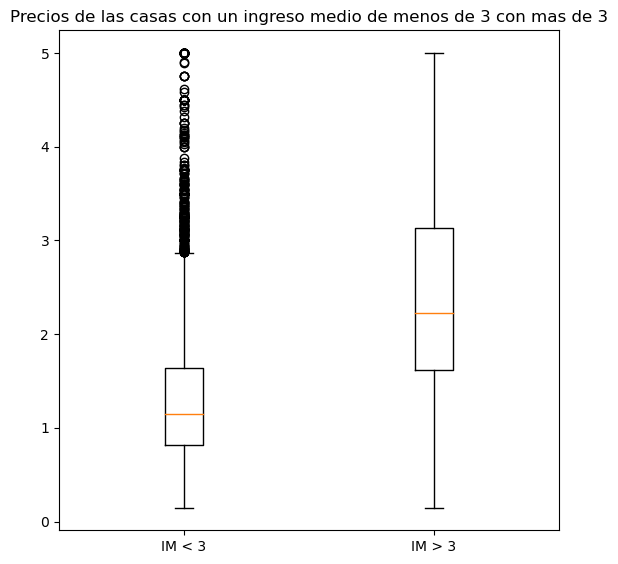

In [8]:
fig = plt.figure(figsize =(5, 5))
 
ax = fig.add_axes([0, 1,1, 1])

plt.boxplot([df['Price'][df.MedInc < 3], df['Price'][df.MedInc > 3]])
plt.title("Precios de las casas con un ingreso medio de menos de 3 con mas de 3")
ax.set_xticklabels(['IM < 3', 'IM > 3'])
plt.show()

*Ocupacion:*
- Un histograma de la distribucion de la ocupacion media
- Un boxplot en el que compares los precios de las casas con una ocupacion menor de 1000 y mayor de 1000

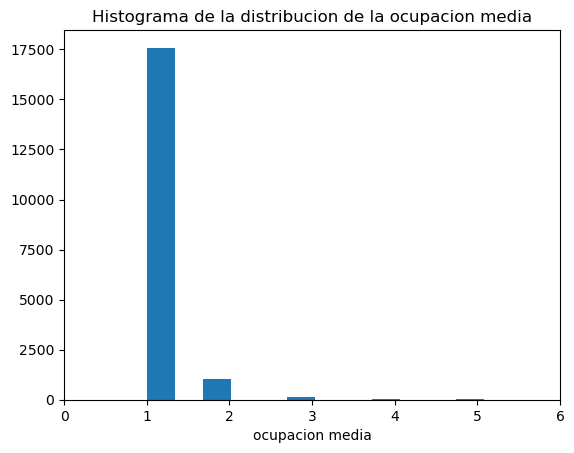

In [19]:
np = df['AveOccup'].value_counts()
plt.hist(np, bins=100)

plt.title("Histograma de la distribucion de la ocupacion media")
plt.xlabel("ocupacion media")
plt.xlim(0,6)
plt.show()

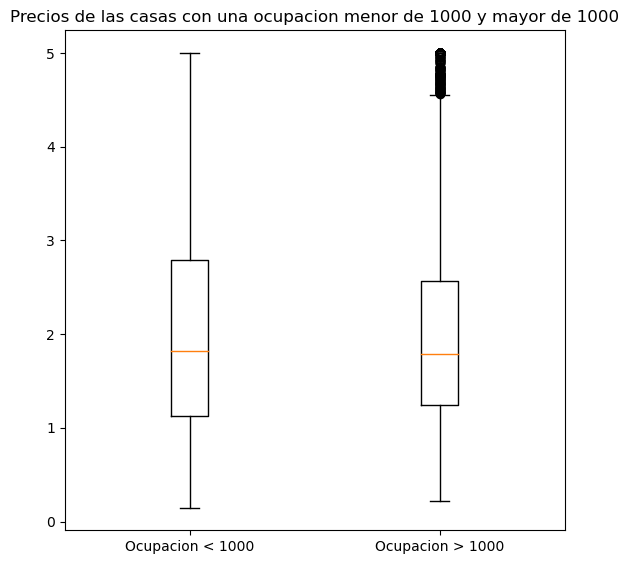

In [10]:
data =[df['Price'][df.Population < 1000], 
       df['Price'][df.Population > 1000]]

fig = plt.figure(figsize =(5, 5))
 
ax = fig.add_axes([0, 1,1, 1])

plt.boxplot(data)
plt.title("Precios de las casas con una ocupacion menor de 1000 y mayor de 1000")
ax.set_xticklabels(['Ocupacion < 1000', 'Ocupacion > 1000'])
plt.show()

### Reto 3

Los investigadores han recolectado datos sobre las longitudes de dos especies muy diferentes: hormigas y elefantes. Quieren comparar la variabilidad de las longitudes dentro de estas dos especies.
Los datos en centimetros estan mostrados abajo.

**Media y Desviación Estándar:** Para cada conjunto de datos, calcula la media y la desviación estándar de las longitudes.

**Coeficiente de Variación:** Calcula el coeficiente de variación (CV) para cada conjunto de datos.

Comparación: ¿Cuál de las dos especies muestra una mayor variabilidad en las longitudes

In [32]:
lon_hormigas = [0.6, 0.9, 1, 1.1, 1.1, 0.8, 0.9, 1, 0.7, 0.9]
lon_elefantes = [300, 315, 280, 325, 290, 295, 305, 310, 320, 300]

In [33]:
def CV(x):
    media1 = media(x)
    des1 = desviacion_tipica(x)
    return (des1/media1)*100

In [34]:
dic_hormigas = {"Media": media(lon_hormigas), "Desviacion tipica":desviacion_tipica(lon_hormigas), "Coeficiente de Variación":CV(lon_hormigas)}
dic_elefantes = {"Media": media(lon_elefantes), "Desviacion tipica":desviacion_tipica(lon_elefantes), "Coeficiente de Variación":CV(lon_elefantes)}
print(f'Longitud hormigas: {dic_hormigas}')
print(f'Longitud elefantes: {dic_elefantes}')

Longitud hormigas: {'Media': 0.9, 'Desviacion tipica': 0.1549193338482967, 'Coeficiente de Variación': 17.213259316477412}
Longitud elefantes: {'Media': 304.0, 'Desviacion tipica': 13.19090595827292, 'Coeficiente de Variación': 4.33911380206346}


Los elefantes tienen una mayor variabilidad por tener valores mas altos, mostrando una mayor desviacion tipica.
Sin embargo, para poder compararlo necesitamos el coeficiente de variacion, salvando la diferencia de escala, donde vemos que las hormigas tienen mas de 4 veces mas variacion que los elefantes